In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
# 2020 Data
full_df = pd.read_csv("../../MVP/Data/full_df.csv")

index_df = full_df[full_df['category'] == 'Index']

dji_df = index_df.loc[index_df['stock'] == 'DJI']
inx_df = index_df.loc[index_df['stock'] == 'INX']
ndaq_df = index_df.loc[index_df['stock'] == 'NDAQ']

In [145]:
# 2008 Data
full_2008_df = pd.read_csv("../../MVP/Data/full_2008_df.csv")

index_08_df = full_2008_df[full_2008_df['category'] == 'Index']

dji_08_df = index_08_df.loc[index_08_df['stock'] == 'DJI']
inx_08_df = index_08_df.loc[index_08_df['stock'] == 'INX']
ndaq_08_df = index_08_df.loc[index_08_df['stock'] == 'NDAQ']

In [163]:
def plot_data(df_20, df_08, title, title_08):
    
    #Zooming in around crashes (1 month prior 1 month post)
    df_20 = df_20.sort_values('dates', ascending=True)

    crash_20 = (df_20['dates'] >= '2020-01-28')
    crash_20_df = df_20.loc[crash_20]

    df_08 = df_08.sort_values('dates', ascending=True)
    crash_08 = (df_08['dates'] >= '2008-08-29') & (df_08['dates'] <= '2008-10-29')
    crash_08_df = df_08.loc[crash_08]

    #Plotting 2020 crash data vs 2008 crash data
    fig = plt.figure(figsize=(20,10))
    
    ax = fig.add_subplot(211)
    crash_20_df.plot(y='close', x='dates', kind='line', ax=ax)
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
   # plt.xticks(crash_20_df['dates'])
    plt.grid()
    
    ax = fig.add_subplot(212)
    crash_08_df.plot(y='close', x='dates', kind='line', ax=ax)
    plt.text('2008-09-29',,'This text ends at point (8,3)',horizontalalignment='right')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title_08)
    plt.grid()
    
    plt.show()    
    
    return ax

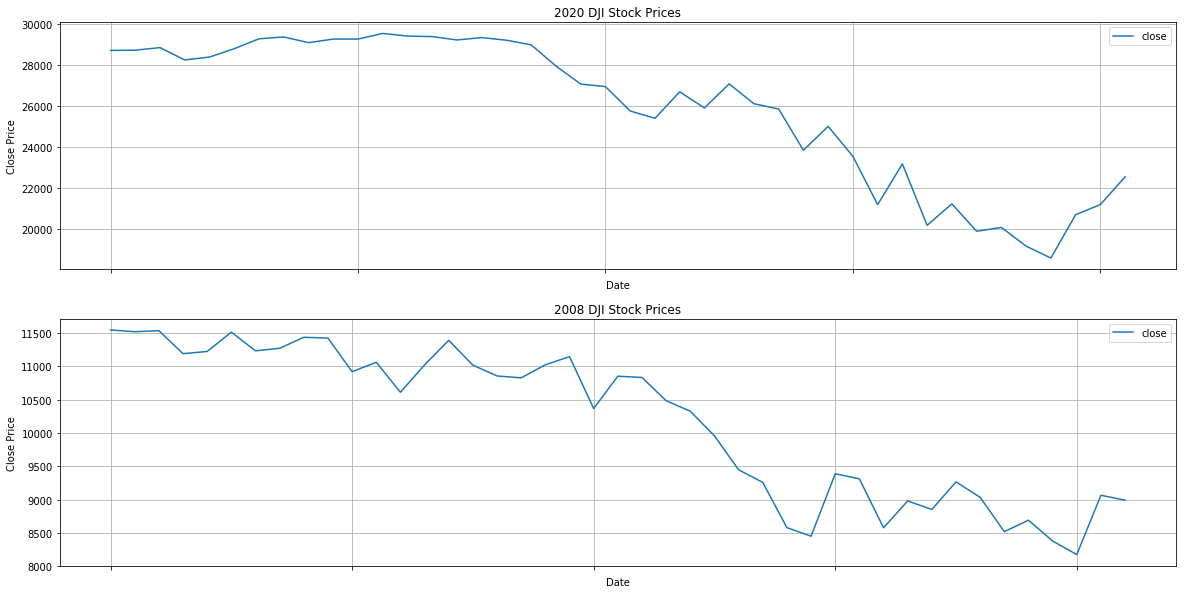

In [164]:
DJI_chart = plot_data(dji_df, dji_08_df, '2020 DJI Stock Prices', '2008 DJI Stock Prices')

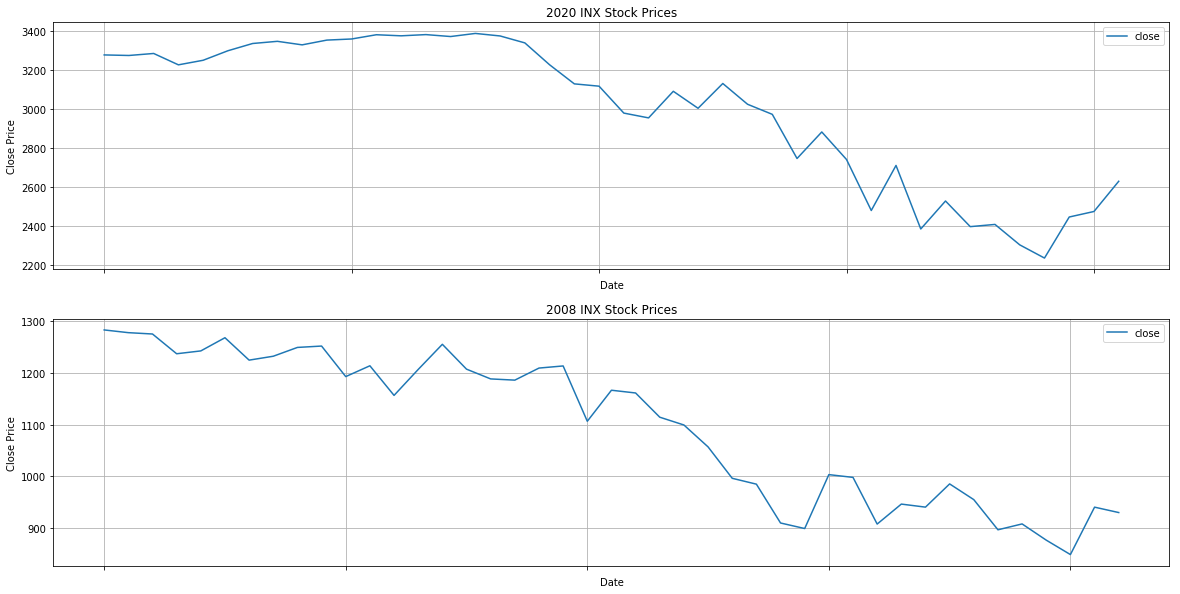

In [159]:
INX_chart = plot_data(inx_df, inx_08_df, '2020 INX Stock Prices', '2008 INX Stock Prices')

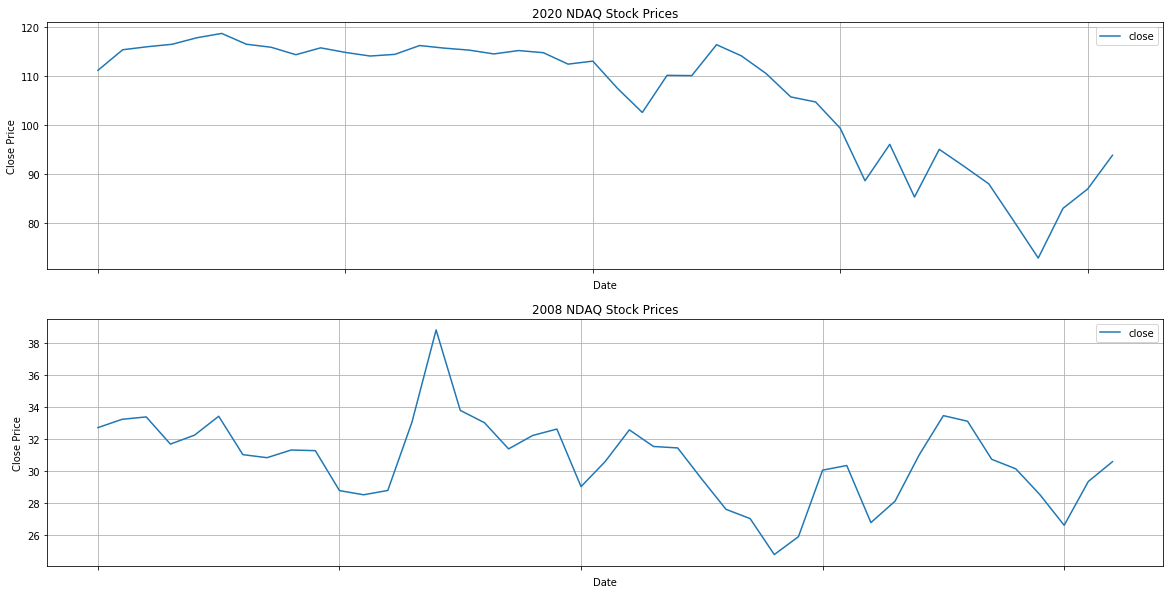

In [160]:
NDAQ_chart = plot_data(ndaq_df, ndaq_08_df, '2020 NDAQ Stock Prices', '2008 NDAQ Stock Prices')